In [1]:
# https://mypoeticside.com/poets/edgar-allan-poe-poems
import re
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from tqdm import tqdm
import torch.optim as optim
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ralampay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ralampay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
filename = "edgar-allan-poe.txt"
f = open(filename, 'r')

raw_text = f.read()

raw_text

"In visions of the dark night\nI have dreamed of joy departed-\nBut a waking dream of life and light\nHath left me broken-hearted.\n\nAh! what is not a dream by day\nTo him whose eyes are cast\nOn things around him with a ray\nTurned back upon the past?\n\nThat holy dream- that holy dream,\nWhile all the world were chiding,\nHath cheered me as a lovely beam\nA lonely spirit guiding.\n\nWhat though that light, thro' storm and night,\nSo trembled from afar-\nWhat could there be more purely bright\nIn Truth's day-star?\n\nFrom childhood's hour I have not been\nAs others were; I have not seen\nAs others saw; I could not bring\nMy passions from a common spring.\nFrom the same source I have not taken\nMy sorrow; I could not awaken\nMy heart to joy at the same tone;\nAnd all I loved, I loved alone.\nThen- in my childhood, in the dawn\nOf a most stormy life- was drawn\nFrom every depth of good and ill\nThe mystery which binds me still:\nFrom the torrent, or the fountain,\nFrom the red cliff of

In [3]:
processed_text = re.sub(r'[^\x00-\x7f]', r'', raw_text)

processed_text

"In visions of the dark night\nI have dreamed of joy departed-\nBut a waking dream of life and light\nHath left me broken-hearted.\n\nAh! what is not a dream by day\nTo him whose eyes are cast\nOn things around him with a ray\nTurned back upon the past?\n\nThat holy dream- that holy dream,\nWhile all the world were chiding,\nHath cheered me as a lovely beam\nA lonely spirit guiding.\n\nWhat though that light, thro' storm and night,\nSo trembled from afar-\nWhat could there be more purely bright\nIn Truth's day-star?\n\nFrom childhood's hour I have not been\nAs others were; I have not seen\nAs others saw; I could not bring\nMy passions from a common spring.\nFrom the same source I have not taken\nMy sorrow; I could not awaken\nMy heart to joy at the same tone;\nAnd all I loved, I loved alone.\nThen- in my childhood, in the dawn\nOf a most stormy life- was drawn\nFrom every depth of good and ill\nThe mystery which binds me still:\nFrom the torrent, or the fountain,\nFrom the red cliff of

In [4]:
word_tokens = word_tokenize(processed_text)

len(word_tokens)

585

In [5]:
unique_words = sorted(list(set(word_tokens)))

len(unique_words)

272

In [6]:
unique_words

['!',
 "'",
 "'T",
 "'Twere",
 "'d",
 "'s",
 "'t",
 '(',
 ')',
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 'A',
 'Ah',
 'And',
 'As',
 'But',
 'Came',
 'Continuing-',
 'Dreams',
 'Eternity',
 'For',
 'From',
 'Hath',
 'Heaven',
 'Hope',
 'I',
 'In',
 'Its',
 'Love-',
 'My',
 'Of',
 'Oh',
 'On',
 'Or',
 'Paradise',
 'Shone',
 'So',
 'Than',
 'That',
 'The',
 'Then-',
 'To',
 'Too',
 'Truth',
 'Turned',
 'What',
 'When',
 'While',
 'Yes',
 'a',
 'afar-',
 'all',
 'alone',
 'an',
 'and',
 'apart',
 'are',
 'around',
 'as',
 'at',
 'autumn',
 'awaken',
 'awakening',
 'back',
 'be',
 'be-',
 'beam',
 'been',
 'behind',
 'beings',
 'better',
 'binds',
 'birth',
 'blue',
 'bound',
 'boyhood-',
 'bright',
 'bring',
 'brings',
 'broken-hearted',
 'by',
 'cast',
 'chaos',
 'cheered',
 'chiding',
 'childhood',
 'chilly',
 'cliff',
 'climes',
 'cloud',
 'cold',
 'coldly-',
 'coloring',
 'common',
 'could',
 'dark',
 'dawn',
 'day',
 'day-star',
 'deep',
 'delirious',
 'demon',
 'departed-',
 'depth',
 'd

In [7]:
word_vocabulary = unique_words

indices_words = dict((index, word) for index, word in enumerate(word_vocabulary))

indices_words

{0: '!',
 1: "'",
 2: "'T",
 3: "'Twere",
 4: "'d",
 5: "'s",
 6: "'t",
 7: '(',
 8: ')',
 9: ',',
 10: '-',
 11: '.',
 12: ':',
 13: ';',
 14: '?',
 15: 'A',
 16: 'Ah',
 17: 'And',
 18: 'As',
 19: 'But',
 20: 'Came',
 21: 'Continuing-',
 22: 'Dreams',
 23: 'Eternity',
 24: 'For',
 25: 'From',
 26: 'Hath',
 27: 'Heaven',
 28: 'Hope',
 29: 'I',
 30: 'In',
 31: 'Its',
 32: 'Love-',
 33: 'My',
 34: 'Of',
 35: 'Oh',
 36: 'On',
 37: 'Or',
 38: 'Paradise',
 39: 'Shone',
 40: 'So',
 41: 'Than',
 42: 'That',
 43: 'The',
 44: 'Then-',
 45: 'To',
 46: 'Too',
 47: 'Truth',
 48: 'Turned',
 49: 'What',
 50: 'When',
 51: 'While',
 52: 'Yes',
 53: 'a',
 54: 'afar-',
 55: 'all',
 56: 'alone',
 57: 'an',
 58: 'and',
 59: 'apart',
 60: 'are',
 61: 'around',
 62: 'as',
 63: 'at',
 64: 'autumn',
 65: 'awaken',
 66: 'awakening',
 67: 'back',
 68: 'be',
 69: 'be-',
 70: 'beam',
 71: 'been',
 72: 'behind',
 73: 'beings',
 74: 'better',
 75: 'binds',
 76: 'birth',
 77: 'blue',
 78: 'bound',
 79: 'boyhood-',
 

In [8]:
word_indices = dict((word, index) for index, word in enumerate(word_vocabulary))

word_indices

{'!': 0,
 "'": 1,
 "'T": 2,
 "'Twere": 3,
 "'d": 4,
 "'s": 5,
 "'t": 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 ':': 12,
 ';': 13,
 '?': 14,
 'A': 15,
 'Ah': 16,
 'And': 17,
 'As': 18,
 'But': 19,
 'Came': 20,
 'Continuing-': 21,
 'Dreams': 22,
 'Eternity': 23,
 'For': 24,
 'From': 25,
 'Hath': 26,
 'Heaven': 27,
 'Hope': 28,
 'I': 29,
 'In': 30,
 'Its': 31,
 'Love-': 32,
 'My': 33,
 'Of': 34,
 'Oh': 35,
 'On': 36,
 'Or': 37,
 'Paradise': 38,
 'Shone': 39,
 'So': 40,
 'Than': 41,
 'That': 42,
 'The': 43,
 'Then-': 44,
 'To': 45,
 'Too': 46,
 'Truth': 47,
 'Turned': 48,
 'What': 49,
 'When': 50,
 'While': 51,
 'Yes': 52,
 'a': 53,
 'afar-': 54,
 'all': 55,
 'alone': 56,
 'an': 57,
 'and': 58,
 'apart': 59,
 'are': 60,
 'around': 61,
 'as': 62,
 'at': 63,
 'autumn': 64,
 'awaken': 65,
 'awakening': 66,
 'back': 67,
 'be': 68,
 'be-': 69,
 'beam': 70,
 'been': 71,
 'behind': 72,
 'beings': 73,
 'better': 74,
 'binds': 75,
 'birth': 76,
 'blue': 77,
 'bound': 78,
 'boyhood-': 79,
 

In [9]:
block_size = 3
step = 1

x = []
y = []

for i in range(0, len(word_tokens) - block_size, step):
    x.append(word_tokens[i: i+block_size])
    y.append(word_tokens[i + block_size])

In [10]:
x

[['In', 'visions', 'of'],
 ['visions', 'of', 'the'],
 ['of', 'the', 'dark'],
 ['the', 'dark', 'night'],
 ['dark', 'night', 'I'],
 ['night', 'I', 'have'],
 ['I', 'have', 'dreamed'],
 ['have', 'dreamed', 'of'],
 ['dreamed', 'of', 'joy'],
 ['of', 'joy', 'departed-'],
 ['joy', 'departed-', 'But'],
 ['departed-', 'But', 'a'],
 ['But', 'a', 'waking'],
 ['a', 'waking', 'dream'],
 ['waking', 'dream', 'of'],
 ['dream', 'of', 'life'],
 ['of', 'life', 'and'],
 ['life', 'and', 'light'],
 ['and', 'light', 'Hath'],
 ['light', 'Hath', 'left'],
 ['Hath', 'left', 'me'],
 ['left', 'me', 'broken-hearted'],
 ['me', 'broken-hearted', '.'],
 ['broken-hearted', '.', 'Ah'],
 ['.', 'Ah', '!'],
 ['Ah', '!', 'what'],
 ['!', 'what', 'is'],
 ['what', 'is', 'not'],
 ['is', 'not', 'a'],
 ['not', 'a', 'dream'],
 ['a', 'dream', 'by'],
 ['dream', 'by', 'day'],
 ['by', 'day', 'To'],
 ['day', 'To', 'him'],
 ['To', 'him', 'whose'],
 ['him', 'whose', 'eyes'],
 ['whose', 'eyes', 'are'],
 ['eyes', 'are', 'cast'],
 ['are', 'c

In [11]:
y

['the',
 'dark',
 'night',
 'I',
 'have',
 'dreamed',
 'of',
 'joy',
 'departed-',
 'But',
 'a',
 'waking',
 'dream',
 'of',
 'life',
 'and',
 'light',
 'Hath',
 'left',
 'me',
 'broken-hearted',
 '.',
 'Ah',
 '!',
 'what',
 'is',
 'not',
 'a',
 'dream',
 'by',
 'day',
 'To',
 'him',
 'whose',
 'eyes',
 'are',
 'cast',
 'On',
 'things',
 'around',
 'him',
 'with',
 'a',
 'ray',
 'Turned',
 'back',
 'upon',
 'the',
 'past',
 '?',
 'That',
 'holy',
 'dream-',
 'that',
 'holy',
 'dream',
 ',',
 'While',
 'all',
 'the',
 'world',
 'were',
 'chiding',
 ',',
 'Hath',
 'cheered',
 'me',
 'as',
 'a',
 'lovely',
 'beam',
 'A',
 'lonely',
 'spirit',
 'guiding',
 '.',
 'What',
 'though',
 'that',
 'light',
 ',',
 'thro',
 "'",
 'storm',
 'and',
 'night',
 ',',
 'So',
 'trembled',
 'from',
 'afar-',
 'What',
 'could',
 'there',
 'be',
 'more',
 'purely',
 'bright',
 'In',
 'Truth',
 "'s",
 'day-star',
 '?',
 'From',
 'childhood',
 "'s",
 'hour',
 'I',
 'have',
 'not',
 'been',
 'As',
 'others',
 '

In [12]:
y_ints = [word_indices[item] for item in y]

y_ints

[237,
 99,
 181,
 29,
 133,
 111,
 186,
 152,
 106,
 19,
 53,
 260,
 109,
 186,
 157,
 58,
 159,
 26,
 155,
 169,
 83,
 11,
 16,
 0,
 263,
 149,
 184,
 53,
 109,
 84,
 101,
 45,
 137,
 266,
 117,
 60,
 85,
 36,
 241,
 61,
 137,
 269,
 53,
 202,
 48,
 67,
 255,
 237,
 199,
 14,
 42,
 139,
 110,
 236,
 139,
 109,
 9,
 51,
 55,
 237,
 270,
 262,
 88,
 9,
 26,
 87,
 169,
 62,
 53,
 168,
 70,
 15,
 163,
 223,
 128,
 11,
 49,
 243,
 236,
 159,
 9,
 245,
 1,
 228,
 58,
 181,
 9,
 40,
 254,
 124,
 54,
 49,
 98,
 240,
 68,
 174,
 201,
 80,
 30,
 47,
 5,
 102,
 14,
 25,
 89,
 5,
 143,
 29,
 133,
 184,
 71,
 18,
 191,
 262,
 13,
 29,
 133,
 184,
 212,
 18,
 191,
 211,
 13,
 29,
 98,
 184,
 81,
 33,
 198,
 124,
 53,
 97,
 225,
 11,
 25,
 237,
 210,
 221,
 29,
 133,
 184,
 234,
 33,
 220,
 13,
 29,
 98,
 184,
 65,
 33,
 134,
 250,
 152,
 63,
 237,
 210,
 251,
 13,
 17,
 55,
 29,
 166,
 9,
 29,
 166,
 56,
 11,
 44,
 148,
 179,
 89,
 9,
 148,
 237,
 100,
 34,
 53,
 176,
 229,
 158,
 261,
 108,
 25,
 

In [13]:
y_encoded = []

for item in y_ints:
    y_vector = np.zeros(len(unique_words))
    y_vector[item] = 1
    y_encoded.append(y_vector)

y_encoded = np.array(y_encoded)
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
x_encoded = []

for x_arr in x:
    x_ints = [word_indices[item] for item in x_arr]
    
    x_row = []
    for item in x_ints:
        x_vector = np.zeros(len(unique_words))
        x_vector[item] = 1
        x_row.append(x_vector)
        
    x_encoded.append(x_row)
    
x_encoded = np.array(x_encoded)

x_encoded

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [15]:
class EdgarAllanPoeAI(nn.Module):
    def __init__(self, input_dim, output_dim, block_size):
        super().__init__()

        self.embeddings = nn.Linear(input_dim, 30 * block_size)
        self.hidden = nn.Linear(30 * block_size, 50)
        self.output = nn.Linear(50, output_dim)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # f(x) = a(f(x))
        x = self.relu(self.embeddings(x))
        x = self.relu(self.hidden(x))
        y = self.sigmoid(self.output(x))
        y = self.softmax(y)

        return y

In [16]:
input_size = x_encoded[0].ravel().shape[0]

input_size

816

In [17]:
model = EdgarAllanPoeAI(input_size, len(unique_words), block_size)

model

EdgarAllanPoeAI(
  (embeddings): Linear(in_features=816, out_features=90, bias=True)
  (hidden): Linear(in_features=90, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=272, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [18]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n_samples = len(x)
    
    def __getitem__(self, index):
        return self.x[index].ravel(), self.y[index]
    
    def __len__(self):
        return self.n_samples


In [19]:
device = 'cpu'
x = torch.tensor(x_encoded).float().to(device)
y = torch.tensor(y_encoded).float().to(device)

training_ds = CustomDataset(x, y)

training_ds

In [20]:
from torch.utils.data import DataLoader

batch_size = 5

train_loader = DataLoader(
    training_ds,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [21]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

softmax = nn.Softmax(dim=1)

def train_fn(loader, model, optimizer, loss_fn, device):
    loop = tqdm(loader)

    ave_loss = 0
    count = 0 
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Forward
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        # Backward
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        # Update tqdm
        loop.set_postfix(loss=loss.item())

        count += 1
        ave_loss += loss.item()
    
    ave_loss = ave_loss / count

    return ave_loss

In [22]:
epochs = 100

average_losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    ave_loss = train_fn(train_loader, model, optimizer, criterion, device)
    
    average_losses.append(ave_loss)
        
    print("Ave Loss: {}".format(ave_loss))

Epoch: 0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 438.60it/s, loss=5.61]


Ave Loss: 5.6057999480483875
Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 545.25it/s, loss=5.61]


Ave Loss: 5.605790778103038
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 551.22it/s, loss=5.61]


Ave Loss: 5.605783087575538
Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 567.27it/s, loss=5.61]


Ave Loss: 5.60577376683553
Epoch: 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 530.08it/s, loss=5.61]


Ave Loss: 5.605761617676825
Epoch: 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 555.82it/s, loss=5.61]


Ave Loss: 5.605743872813689
Epoch: 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 553.07it/s, loss=5.61]


Ave Loss: 5.605715083260821
Epoch: 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 552.41it/s, loss=5.61]


Ave Loss: 5.605664526295458
Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 584.35it/s, loss=5.61]


Ave Loss: 5.605574188069401
Epoch: 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 615.56it/s, loss=5.61]


Ave Loss: 5.605419468675923
Epoch: 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 614.68it/s, loss=5.6]


Ave Loss: 5.605185716580122
Epoch: 11


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 638.93it/s, loss=5.6]


Ave Loss: 5.604910895355746
Epoch: 12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 639.30it/s, loss=5.6]


Ave Loss: 5.604658375438462
Epoch: 13


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 652.92it/s, loss=5.6]


Ave Loss: 5.604466369009425
Epoch: 14


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 694.09it/s, loss=5.6]


Ave Loss: 5.604336388090736
Epoch: 15


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 712.43it/s, loss=5.6]


Ave Loss: 5.604251107598981
Epoch: 16


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 671.82it/s, loss=5.6]


Ave Loss: 5.6041938463846845
Epoch: 17


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 684.13it/s, loss=5.6]


Ave Loss: 5.604153433416644
Epoch: 18


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 661.74it/s, loss=5.6]


Ave Loss: 5.604123429355458
Epoch: 19


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 669.67it/s, loss=5.6]


Ave Loss: 5.604100133618738
Epoch: 20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 704.23it/s, loss=5.6]


Ave Loss: 5.604081141643035
Epoch: 21


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 656.41it/s, loss=5.6]


Ave Loss: 5.604065104427501
Epoch: 22


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 662.42it/s, loss=5.6]


Ave Loss: 5.604051113128662
Epoch: 23


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 661.20it/s, loss=5.6]


Ave Loss: 5.604038556416829
Epoch: 24


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 654.05it/s, loss=5.6]


Ave Loss: 5.604026981908032
Epoch: 25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 651.03it/s, loss=5.6]


Ave Loss: 5.604015994275737
Epoch: 26


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 709.09it/s, loss=5.6]


Ave Loss: 5.604005512009319
Epoch: 27


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 653.59it/s, loss=5.6]


Ave Loss: 5.603995319105621
Epoch: 28


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 672.47it/s, loss=5.6]


Ave Loss: 5.603985399262518
Epoch: 29


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 649.66it/s, loss=5.6]


Ave Loss: 5.603975703573634
Epoch: 30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 657.10it/s, loss=5.6]


Ave Loss: 5.603966158679408
Epoch: 31


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 660.58it/s, loss=5.6]


Ave Loss: 5.603956707522401
Epoch: 32


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 654.51it/s, loss=5.6]


Ave Loss: 5.6039473419515495
Epoch: 33


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 668.89it/s, loss=5.6]


Ave Loss: 5.60393804566473
Epoch: 34


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 683.57it/s, loss=5.6]


Ave Loss: 5.603928623036442
Epoch: 35


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 663.30it/s, loss=5.6]


Ave Loss: 5.603919343051747
Epoch: 36


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 630.78it/s, loss=5.6]


Ave Loss: 5.6039102383148975
Epoch: 37


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 663.55it/s, loss=5.6]


Ave Loss: 5.603901117275923
Epoch: 38


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 698.18it/s, loss=5.6]


Ave Loss: 5.603892114427355
Epoch: 39


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 659.49it/s, loss=5.6]


Ave Loss: 5.603883062672411
Epoch: 40


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 623.93it/s, loss=5.6]


Ave Loss: 5.60387401906853
Epoch: 41


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 664.80it/s, loss=5.6]


Ave Loss: 5.60386481651893
Epoch: 42


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 647.29it/s, loss=5.6]


Ave Loss: 5.603855565062955
Epoch: 43


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 656.33it/s, loss=5.6]


Ave Loss: 5.6038462076431665
Epoch: 44


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 645.07it/s, loss=5.6]


Ave Loss: 5.603836776863815
Epoch: 45


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 620.97it/s, loss=5.6]


Ave Loss: 5.603827024117495
Epoch: 46


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 664.85it/s, loss=5.6]


Ave Loss: 5.603817059443547
Epoch: 47


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 640.72it/s, loss=5.6]


Ave Loss: 5.603806687216474
Epoch: 48


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 609.39it/s, loss=5.6]


Ave Loss: 5.603796225327712
Epoch: 49


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 650.34it/s, loss=5.6]


Ave Loss: 5.603785486302824
Epoch: 50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 640.14it/s, loss=5.6]


Ave Loss: 5.60377456795456
Epoch: 51


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 641.47it/s, loss=5.6]


Ave Loss: 5.603763343941452
Epoch: 52


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 648.36it/s, loss=5.6]


Ave Loss: 5.603751981360281
Epoch: 53


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 618.46it/s, loss=5.6]


Ave Loss: 5.603740296812139
Epoch: 54


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 625.68it/s, loss=5.6]


Ave Loss: 5.60372833105234
Epoch: 55


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 627.11it/s, loss=5.6]


Ave Loss: 5.603716047401102
Epoch: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 580.27it/s, loss=5.6]


Ave Loss: 5.603703596653083
Epoch: 57


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 625.16it/s, loss=5.6]


Ave Loss: 5.603690917675312
Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 650.10it/s, loss=5.6]


Ave Loss: 5.603677920806102
Epoch: 59


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 624.50it/s, loss=5.6]


Ave Loss: 5.603664650876298
Epoch: 60


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 640.40it/s, loss=5.6]


Ave Loss: 5.603651067130586
Epoch: 61


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 639.68it/s, loss=5.6]


Ave Loss: 5.603637173644498
Epoch: 62


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 635.50it/s, loss=5.6]


Ave Loss: 5.603622986720159
Epoch: 63


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 570.12it/s, loss=5.6]


Ave Loss: 5.603608485979912
Epoch: 64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 607.23it/s, loss=5.6]


Ave Loss: 5.60359361436632
Epoch: 65


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 625.33it/s, loss=5.6]


Ave Loss: 5.603578404483632
Epoch: 66


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 603.83it/s, loss=5.6]


Ave Loss: 5.603562950069069
Epoch: 67


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 581.60it/s, loss=5.6]


Ave Loss: 5.6035470514215975
Epoch: 68


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 591.92it/s, loss=5.6]


Ave Loss: 5.603530814505031
Epoch: 69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 582.26it/s, loss=5.6]


Ave Loss: 5.6035141700353375
Epoch: 70


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 597.81it/s, loss=5.6]


Ave Loss: 5.603496849027454
Epoch: 71


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 621.47it/s, loss=5.6]


Ave Loss: 5.603479263110039
Epoch: 72


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 613.90it/s, loss=5.6]


Ave Loss: 5.603461322621403
Epoch: 73


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 598.58it/s, loss=5.6]


Ave Loss: 5.603443031637077
Epoch: 74


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 578.66it/s, loss=5.6]


Ave Loss: 5.603424304570908
Epoch: 75


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 617.75it/s, loss=5.6]


Ave Loss: 5.603405121045235
Epoch: 76


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 624.55it/s, loss=5.6]


Ave Loss: 5.603385595174936
Epoch: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 600.24it/s, loss=5.6]


Ave Loss: 5.603365510956854
Epoch: 78


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 622.42it/s, loss=5.6]


Ave Loss: 5.603345104771802
Epoch: 79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 594.96it/s, loss=5.6]


Ave Loss: 5.603324396997436
Epoch: 80


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 638.47it/s, loss=5.6]


Ave Loss: 5.603303155328473
Epoch: 81


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 642.07it/s, loss=5.6]


Ave Loss: 5.603281530559572
Epoch: 82


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 634.62it/s, loss=5.6]


Ave Loss: 5.603259600125826
Epoch: 83


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 621.02it/s, loss=5.6]


Ave Loss: 5.603237168401734
Epoch: 84


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 639.69it/s, loss=5.6]


Ave Loss: 5.603214227236235
Epoch: 85


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 600.47it/s, loss=5.6]


Ave Loss: 5.6031906299102
Epoch: 86


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 631.57it/s, loss=5.6]


Ave Loss: 5.603166906242697
Epoch: 87


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 611.57it/s, loss=5.6]


Ave Loss: 5.603142828003973
Epoch: 88


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 618.28it/s, loss=5.6]


Ave Loss: 5.6031186478769675
Epoch: 89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 646.02it/s, loss=5.6]


Ave Loss: 5.603094003139398
Epoch: 90


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 611.38it/s, loss=5.6]


Ave Loss: 5.603069280966734
Epoch: 91


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 646.74it/s, loss=5.6]


Ave Loss: 5.603044216449444
Epoch: 92


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 631.30it/s, loss=5.6]


Ave Loss: 5.603019021515154
Epoch: 93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 614.54it/s, loss=5.6]


Ave Loss: 5.602993663559612
Epoch: 94


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 601.08it/s, loss=5.6]


Ave Loss: 5.602968215942383
Epoch: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 644.77it/s, loss=5.6]


Ave Loss: 5.602942491189028
Epoch: 96


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 616.09it/s, loss=5.6]


Ave Loss: 5.602916786813329
Epoch: 97


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 602.43it/s, loss=5.6]


Ave Loss: 5.602890972398285
Epoch: 98


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 615.34it/s, loss=5.6]


Ave Loss: 5.602865113152398
Epoch: 99


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 587.38it/s, loss=5.6]

Ave Loss: 5.602839050129948


In [23]:
poem = ['I', 'could', 'dream']

x_ints = [word_indices[item] for item in poem]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

output

/tmp/ipykernel_13261/295436269.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()


array([0.00578878, 0.00566824, 0.00318246, 0.00346632, 0.00318246,
       0.0034072 , 0.00319087, 0.00318246, 0.00318246, 0.00750232,
       0.00318246, 0.00700253, 0.00364945, 0.00420752, 0.0055394 ,
       0.00377851, 0.00324105, 0.00502851, 0.00531486, 0.00353369,
       0.00318247, 0.00318246, 0.00318246, 0.00319051, 0.00319679,
       0.00716884, 0.00396632, 0.0037801 , 0.00318246, 0.00796573,
       0.00358039, 0.00323893, 0.00319881, 0.00467794, 0.0064049 ,
       0.00318246, 0.00323613, 0.00321981, 0.00323817, 0.00318246,
       0.00318246, 0.00318247, 0.00353421, 0.00318246, 0.00322034,
       0.00370002, 0.00318563, 0.00318246, 0.00318246, 0.00340963,
       0.00318246, 0.00318246, 0.00318246, 0.00775625, 0.00321245,
       0.00352292, 0.00318246, 0.00318246, 0.00772673, 0.00318247,
       0.00318765, 0.00323046, 0.00370215, 0.00337324, 0.00330123,
       0.00340257, 0.00318246, 0.00325388, 0.00381147, 0.00318246,
       0.00345434, 0.00790265, 0.00318246, 0.00318247, 0.00318

<BarContainer object of 272 artists>

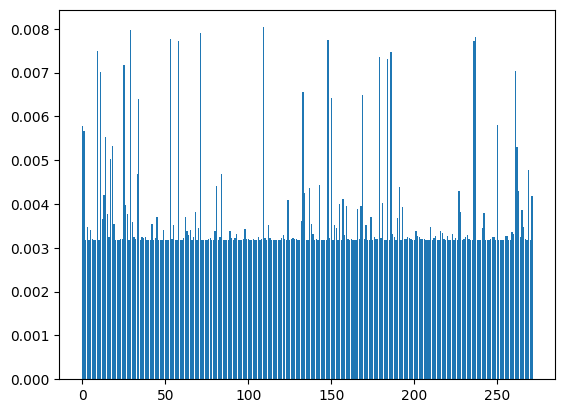

In [24]:
import matplotlib.pyplot as plt

plt.bar(range(len(output)), output)

In [25]:
index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word1 = indices_words[index]

word1

'its'

In [26]:
poem.append(word1)

In [27]:
phrase = ['could', 'dream', word1]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word2 = indices_words[index]

word2

'hour'

In [28]:
poem.append(word2)

In [29]:
phrase = ['dream', word1, word2]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word3 = indices_words[index]

word3

'Truth'

In [30]:
poem.append(word3)

In [31]:
phrase = [word1, word2, word3]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word4 = indices_words[index]

word4

'my'

In [32]:
poem.append(word4)

In [33]:
phrase = [word2, word3, word4]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word5 = indices_words[index]

word5

'semblance'

In [34]:
poem.append(word5)

In [35]:
phrase = [word3, word4, word5]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word6 = indices_words[index]

word6

';'

In [36]:
poem.append(word6)

In [37]:
poem

['I', 'could', 'dream', 'its', 'hour', 'Truth', 'my', 'semblance', ';']